[back to blog](../index.html)
# Izhikevich Neural Model on ER Network

In [1]:
%matplotlib notebook
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class makeNet():
    def __init__(self,avrage_connectivity,size):
        self.k=avrage_connectivity
        self.n=size
    def checkC(self,clist,x2):
        ch=False
        for i in range(len(clist)):
            if clist[i]==x2:
                ch =True
        return ch
    def ERnet(self):
        l=int((self.k*self.n)/2)
        li=0
        a=[]
        for i in range(self.n):
            a.append([])
        while li<l:
            r1=random.randint(0,self.n-1)
            r2=random.randint(0,self.n-1)
            if self.checkC(a[r1],r2)==False:
                a[r1].append(r2)
                a[r2].append(r1)
                li+=1
        return a

In [3]:
class izhi():
    def __init__(self,u0,v0,I0,a0,b0,c0,d0,h0):
        self.u=u0
        self.v=v0
        self.I=I0
        self.a=a0
        self.b=b0
        self.c=c0
        self.d=d0
        self.h=h0
        self.t=0
        self.spike=0
        self.spike_time=[]
    def f_v(self,v,u):
        return 0.04*v**2+5*v+140-u+self.I
    def f_u(self,v,u):
        return self.a*(self.b*v-u)
    def k1v(self,v,u):
        return self.h*self.f_v(v,u)
    def k1u(self,v,u):
        return self.h*self.f_u(v,u)
    def k2v(self,v,u):
        return self.h*self.f_v(v+0.5*self.k1v(v,u),u+0.5*self.k1u(v,u))
    def k2u(self,v,u):
        return self.h*self.f_u(v+0.5*self.k1v(v,u),u+0.5*self.k1u(v,u))
    def k3v(self,v,u):
        return self.h*self.f_v(v+0.5*self.k2v(v,u),u+0.5*self.k2u(v,u))
    def k3u(self,v,u):
        return self.h*self.f_u(v+0.5*self.k2v(v,u),u+0.5*self.k2u(v,u))
    def k4v(self,v,u):
        return self.h*self.f_v(v+self.k3v(v,u),u+self.k3u(v,u))
    def k4u(self,v,u):
        return self.h*self.f_u(v+self.k3v(v,u),u+self.k3u(v,u))
    def RKv(self,v,u):
        return v+0.166666667*(self.k1v(v,u)+2*self.k2v(v,u)+2*self.k3v(v,u)+self.k4v(v,u))
    def RKu(self,v,u):
        return u+0.166666667*(self.k1u(v,u)+2*self.k2u(v,u)+2*self.k3u(v,u)+self.k4u(v,u))
    def Run(self,tempI=0):
        self.I+=tempI
        if self.v>=30:
            self.spike=self.spike+1
            self.spike_time.append(self.t)
            self.v=self.c
            self.u=self.u+self.d
        tempV=self.RKv(self.v,self.u)#solve v equation RK4
        tempU=self.RKu(self.v,self.u)#solve u equation RK4
        self.v=tempV
        self.u=tempU
        self.t+=self.h

In [4]:
net1=makeNet(25,50)
a=net1.ERnet()

ns=[]
for i in range(0,50,1):
    v0=random.uniform(-65,30)
    u0=random.uniform(-65,30)
    I0=random.uniform(5,15)
    ns.append(izhi(v0,u0,I0,0.02,0.2,-65,8,0.1))
    
run_steps=2000
g=0.001
Tv=[]
Ttime=[]
for k in range(0,run_steps,1):
    tv=0
    for i in range(0,len(a),1):
        rI=random.uniform(0.0,20.0)
        ns[i].Run()
        tv+=ns[i].v
    Tv.append(tv)
    Ttime.append(ns[0].t)
    for ii in range(0,len(a),1):
        for j in range(0,len(a[ii]),1):
            ns[a[ii][j]].I += g*(ns[ii].v-ns[a[ii][j]].v)

<IPython.core.display.Javascript object>


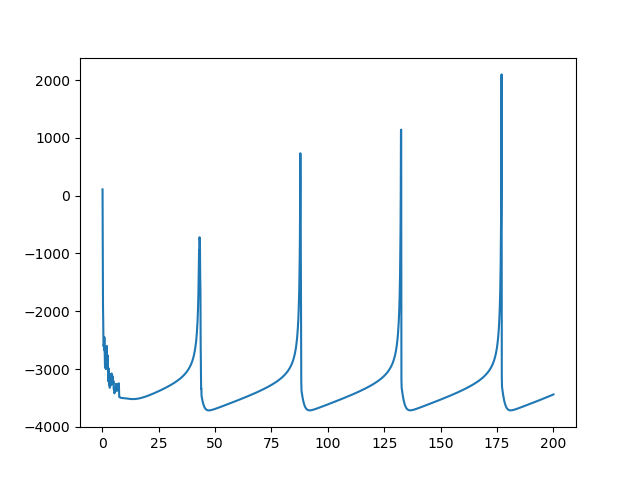

In [5]:
plt.plot(Ttime,Tv)
plt.show()